In [4]:
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (30,15)
import pandas as pd
import pickle
from tsclustering.functions import *
from tsclustering.kmeans import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [5]:
# Loading Sample Time Series Data 
with open('./data/sample_data/X.pickle','rb') as file:
    X = pickle.load(file)
with open('./data/sample_data/y.pickle','rb') as file:
    y = pickle.load(file)

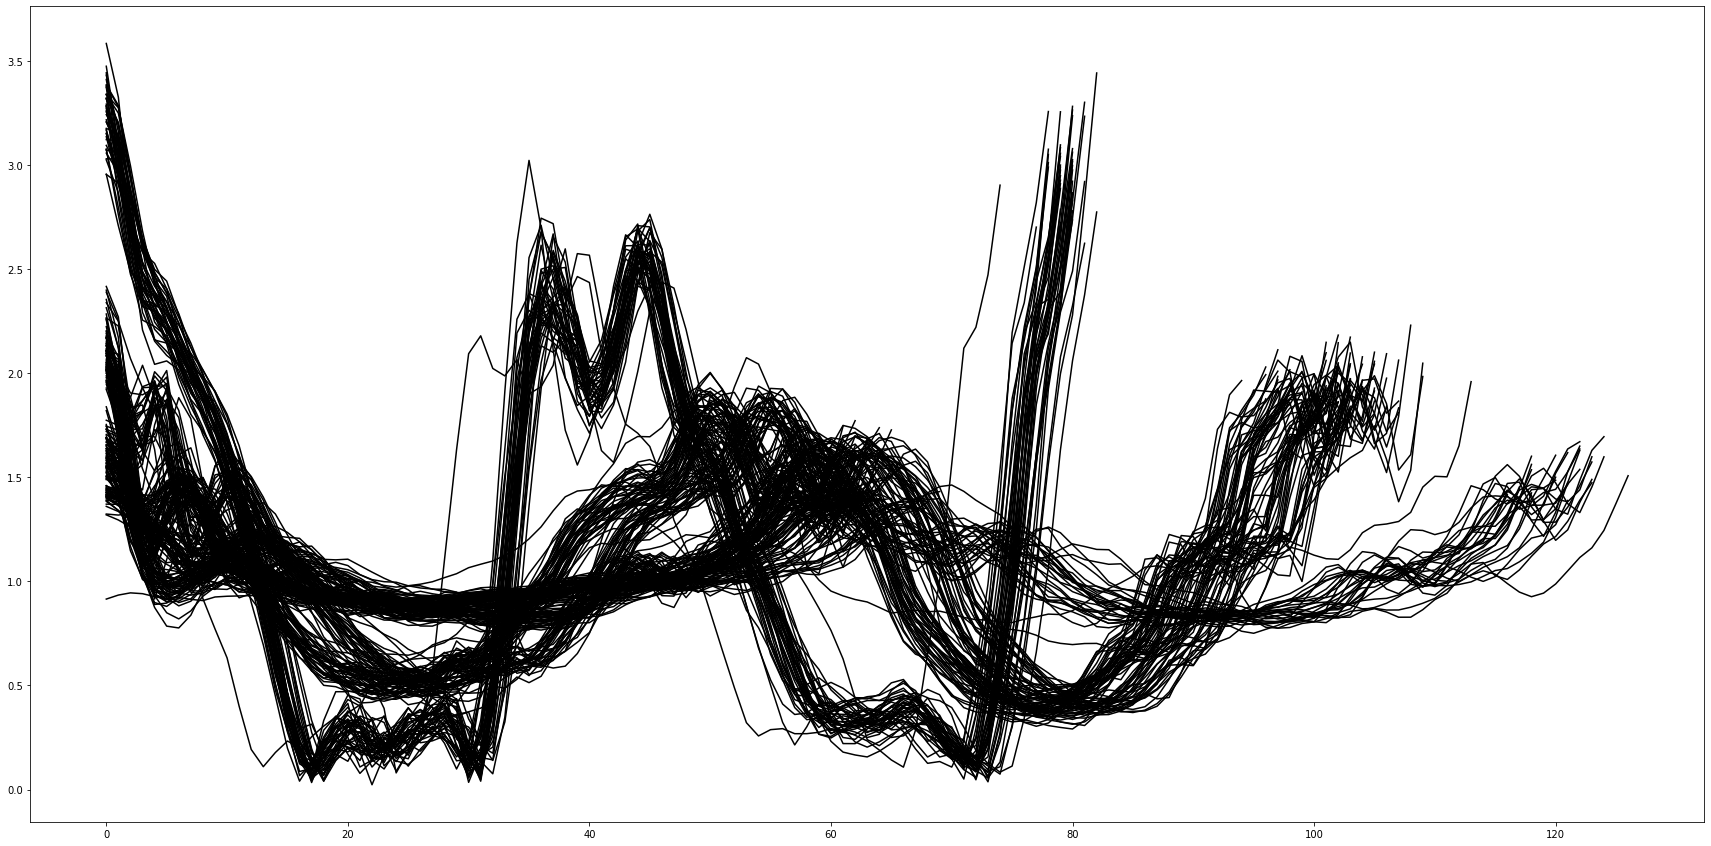

In [12]:
# Plotting sample data

for x in X:
    plt.plot(x, color = 'black');

In [6]:
# Clustering with KMeans

km = KMeans(k_clusters = 3, n_init = 10, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X)

In [7]:
# Calculate the inertia

km._get_inertia()

134.0551293160829

In [8]:
# Using sklearn to evaluate clustering using ground-truth clusters

print('Rand Index:', round(rand_score(km.clusters, y),2))
print('Adjusted RI:', round(adjusted_rand_score(km.clusters, y),2))

Rand Index: 1.0
Adjusted RI: 1.0


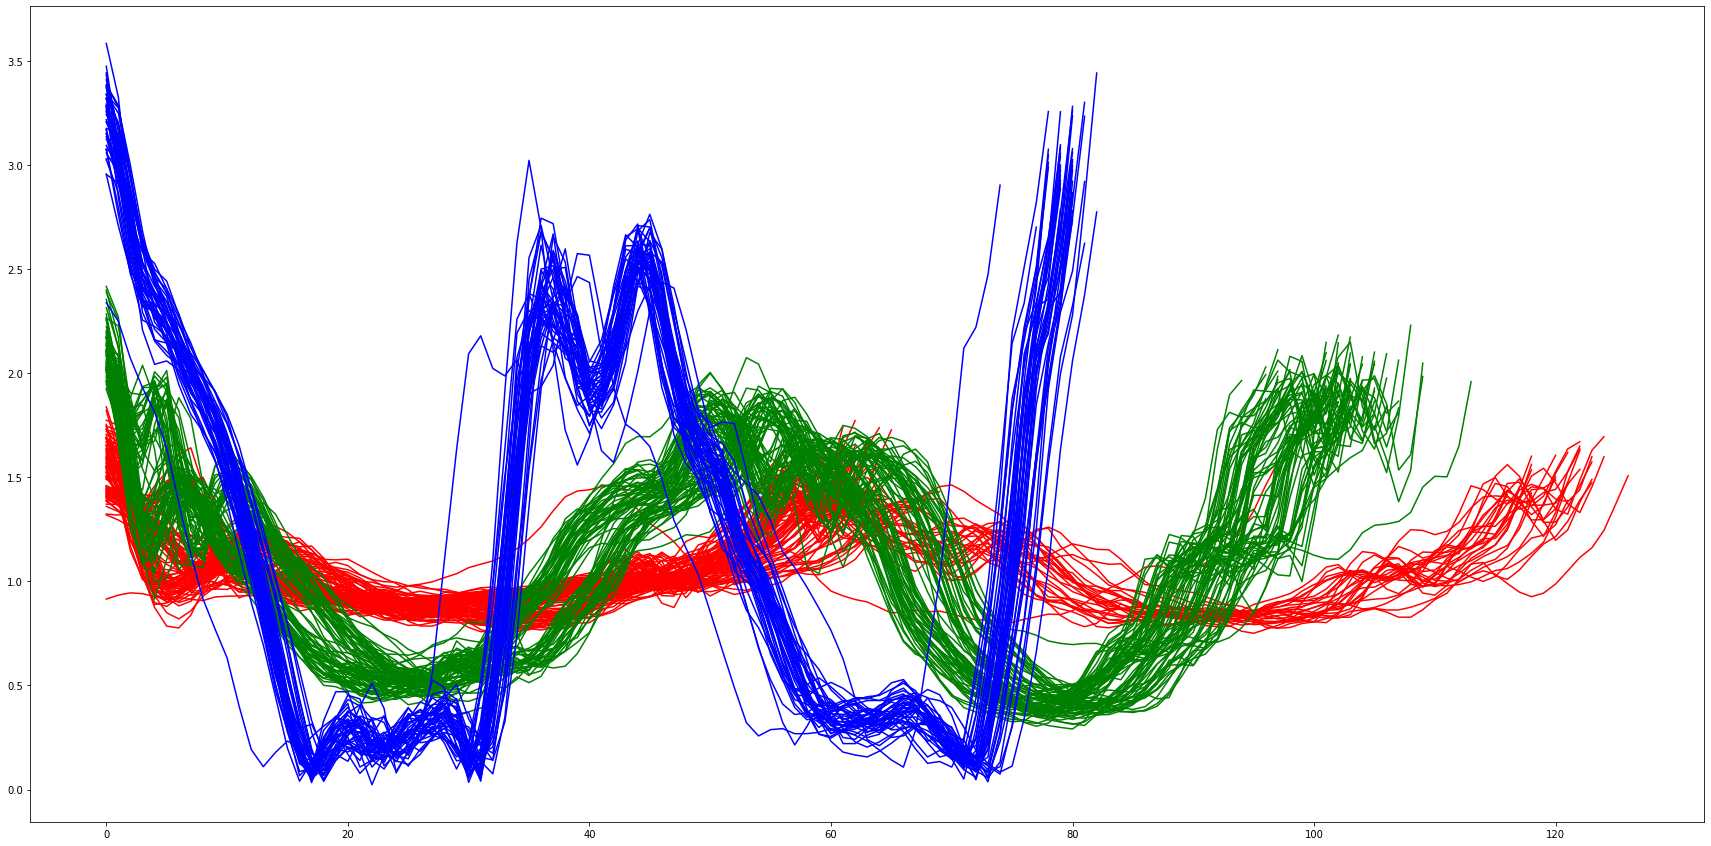

In [9]:
# Access the clusters and centroids attributes

colors = ['red', 'green', 'blue']
for k in range(km.k_clusters):
    cluster = np.array(X, dtype = object)[np.where(np.array(km.clusters) == k)[0]]
    for arr in cluster:
        plt.plot(arr, color = colors[k])

In [10]:
# Soft clustering returns the distance from each instance to each centroid

km.soft_cluster()[:10] # shape: (X.shape[0] x centroids.shape[0])

array([[3.32897753, 3.09044465, 3.53464236],
       [3.33084465, 3.57107956, 3.4575354 ],
       [3.2346275 , 3.37128742, 3.27943309],
       [3.5415822 , 3.46971934, 3.53455073],
       [3.38619142, 3.24715388, 3.5318917 ],
       [3.19784555, 3.24908293, 3.21921075],
       [3.23421851, 3.37329938, 3.09003929],
       [3.22683321, 3.21307521, 3.28381277],
       [3.05830096, 3.00024125, 3.14647225],
       [2.79817391, 2.43719948, 2.99906729]])

In [11]:
# Match an incoming time series array to nearest centroid

print('Clustered Labels:', [km.clusters[0], km.clusters[80]])
print('Predicted Labels:', km.predict([X[0], X[80]]))

Clustered Labels: [1, 2]
Predicted Labels: [1, 2]
